<a href="https://colab.research.google.com/github/Blackcipher101/DeepLearning/blob/master/FlowersandFlowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
URL="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file=tf.keras.utils.get_file(origin=URL,
                                  fname="flower_photos.tgz",
                                  extract=True)
base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
  print(images)

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
['/root/.keras/datasets/flower_photos/roses/4558025386_2c47314528.jpg', '/root/.keras/datasets/flower_photos/roses/5212885371_fe27c406a2_n.jpg', '/root/.keras/datasets/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg', '/root/.keras/datasets/flower_photos/roses/18220342690_f1c20134bd.jpg', '/root/.keras/datasets/flower_photos/roses/8775267816_726ddc6d92_n.jpg', '/root/.keras/datasets/flower_photos/roses/15184419268_7230e9728e.jpg', '/root/.keras/datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg', '/root/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg', '/root/.keras/datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg', '/root/.keras/datasets/flower_photos/roses/2735666555_01d53e74fe.jpg', '/root/.keras/datasets/flower_photos/roses/16545641666_2781e542a0_m.jpg', '/root/.keras/datasets/flower_photos/roses/12572786553_634868f7f2_n.jpg', '/root/.keras/datasets/flower_photos/roses/3065719996_c16ecd5551.jpg', '/root/.keras/datasets/flower_photos/r

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 100
IMG_SHAPE = 150

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

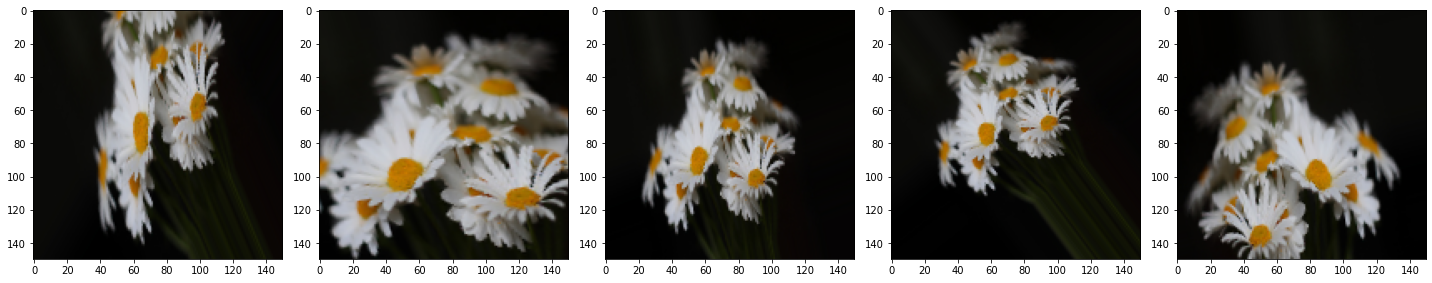

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 18, 18, 64)       

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/80
30/30 [==============================] - 22s 725ms/step - loss: 1.4193 - accuracy: 0.3731 - val_loss: 1.1338 - val_accuracy: 0.5374
Epoch 2/80
30/30 [==============================] - 21s 707ms/step - loss: 1.1281 - accuracy: 0.5421 - val_loss: 1.0165 - val_accuracy: 0.6082
Epoch 3/80
30/30 [==============================] - 21s 705ms/step - loss: 1.0445 - accuracy: 0.5806 - val_loss: 0.9310 - val_accuracy: 0.6463
Epoch 4/80
30/30 [==============================] - 21s 697ms/step - loss: 0.9415 - accuracy: 0.6174 - val_loss: 0.9724 - val_accuracy: 0.6449
Epoch 5/80
30/30 [==============================] - 21s 700ms/step - loss: 0.9189 - accuracy: 0.6385 - val_loss: 0.8958 - val_accuracy: 0.6694
Epoch 6/80
30/30 [==============================] - 21s 694ms/step - loss: 0.8943 - accuracy: 0.6429 - val_loss: 0.8814 - val_accuracy: 0.6599
Epoch 7/80
30/30 [==============================] - 21s 696ms/step - loss: 0.8654 - accuracy: 0.6586 - val_loss: 0.8194 - val_accuracy: 0.6871

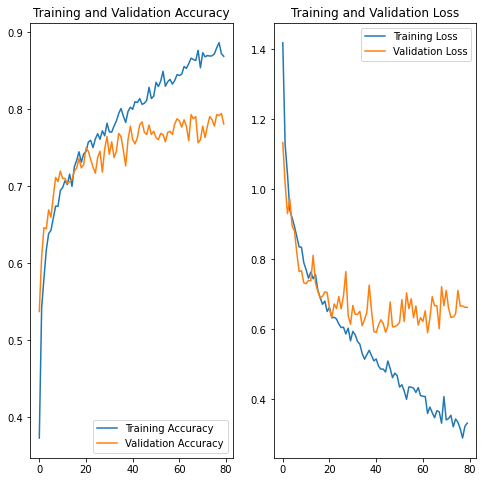

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()